In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = "Fraud data.csv"  # Your dataset
data = pd.read_csv("Fraud data.csv")


In [ ]:
# Step 1: Data Cleaning and Preprocessing
# Handle missing values
data.fillna(0, inplace=True)

# Convert numeric columns with commas to float
numeric_columns = ['POLICY SUMASSURED', 'Premium', 'Annual Income']  # Adjust based on your data
for col in numeric_columns:
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace(',', '').str.strip()  # Remove commas
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to float

# Convert datetime columns into meaningful features
if 'POLICYRISKCOMMENCEMENTDATE' in data.columns:
    data['POLICY_COMMENCEMENT_YEAR'] = pd.to_datetime(data['POLICYRISKCOMMENCEMENTDATE'], errors='coerce').dt.year
    data.drop(['POLICYRISKCOMMENCEMENTDATE'], axis=1, inplace=True)

if 'Date of Death' in data.columns:
    data['DATE_OF_DEATH_YEAR'] = pd.to_datetime(data['Date of Death'], errors='coerce').dt.year
    data.drop(['Date of Death'], axis=1, inplace=True)

if 'INTIMATIONDATE' in data.columns:
    data.drop(['INTIMATIONDATE'], axis=1, inplace=True)

# Encode all categorical columns to numeric format
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

In [ ]:
# Step 2: Define Features (X) and Target (y)
target_column = 'Fraud Category'  # Adjust based on your data
if target_column in data.columns:
    y = data[target_column]
    X = data.drop([target_column, 'Dummy Policy No'], axis=1, errors='ignore')  # Features
else:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

In [ ]:
# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 4: Train the RandomForestClassifier Model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8841309823677582

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.76      0.87      0.81        75
           3       0.00      0.00      0.00         4
           6       0.50      0.67      0.57         3
           7       1.00      0.50      0.67         2
           8       0.93      0.97      0.95       293
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         7

    accuracy                           0.88       397
   macro avg       0.35      0.33      0.33       397
weighted avg       0.84      0.88      0.86       397



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 6: Visualize Feature Importance
feature_importances = model.feature_importances_
features = X.columns

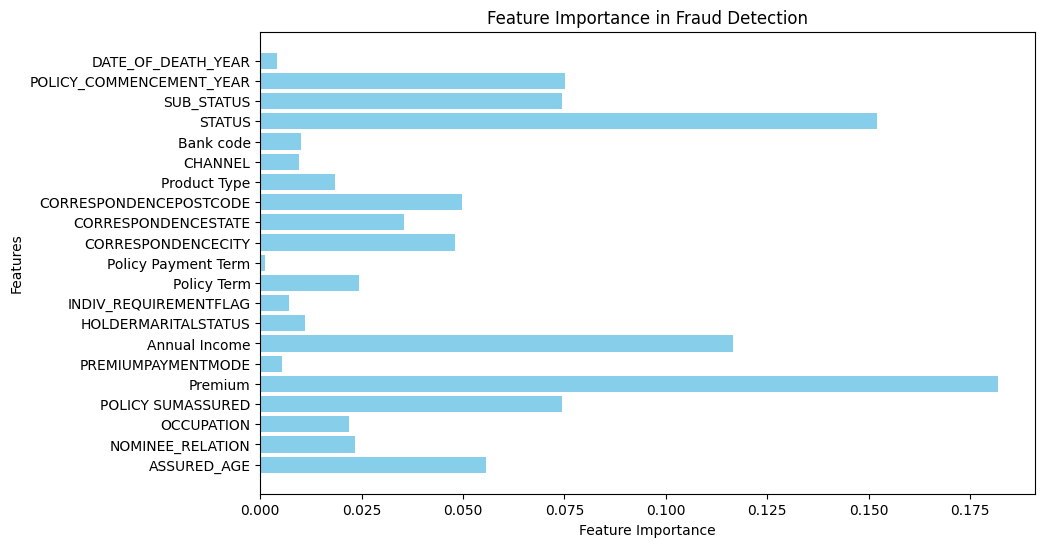

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Fraud Detection")
plt.show()